Linear regression is:
   - fitting a straight line through a set of point
   - Assumption: the relation between x and y is linear
   - Commonly used due to simplicity and interpretability
   - e.i.: predict demande based on price


# Method

To model the data we can use:

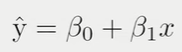

- x: the independent variable
- beta_0: the intercept
- beta1: the slope
- y: dependent variable (variable we want to predit)
- y_hat: estimation of y

We can have more independent variables x1,...,xn such as:

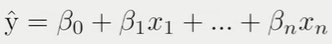

To get the betas, we can:

Minimize the Mean Square Error (MSE), also called Ordinarly least squares (OLS):

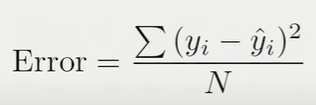

with:
- yi: the observed value
- yi_hat: the estimated value


To reduce the error until a minimal value, we use gradient descent:
- Initialize the betas randomly
- Compute MSE
- Compute gradients and update betas
- Repeat until convergence

The gradient is the derative of the error with respect to a particular parameter beta:

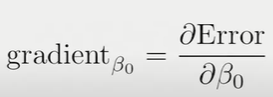

Using the chain rule:

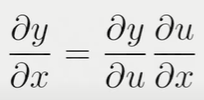

We can write the gradient of beta0 as below:

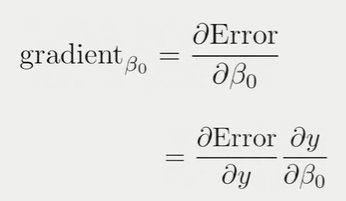

Since we know the equation of the error:

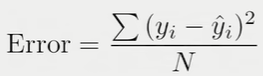

It is possible to write the gradient of the error of beta_0 by calculating the partial derivative of the error with respect to yi and the derivative of y with respect to beta_0 which is equal to one:

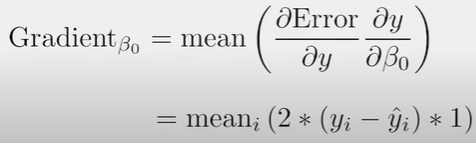

Similarly, we can obtain the gradient of the other beta_i:

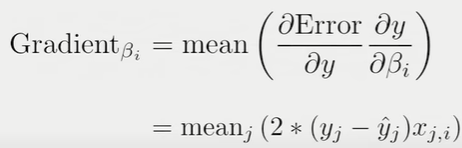



# Implementation
For clarity, better maintenance and optimization, the implementation is performed using a main function and helper functions.

## Helper functions

In [1]:
#Initialize the parameters betas:
def initilize_params(n):
    '''
    Initialize beta_0 to zero and other betas randomly
    '''
    beta_0 = 0
    beta_other = [random.random() for _ in range(n)] #n dimensions
    return beta_0, beta_other

In [2]:
#Compute the gradients of each parameter
def compute_gradient(x, y, beta_0, beta_other, n, m):
    '''
    Compute the gradient of each parameter
    '''
    #Initialize the gradients:
    gradient_beta_0 = 0
    gradient_beta_other = [0] * n #n the number of dimensions
    
    for i in range(m): #for each data point i to m:
        # calculate the estimated y
        y_i_hat = sum(x[i][j] * beta_other[j] for j in range(m)) + beta_0
        # calculate the difference between estimation y_i_hat and observation yi
        derror_dy = 2 * (y[i] - y_i_hat)
        
        #for each data point i until n
        for j in range(n):
            gradient_beta_other[j] += derror_dy * x[i][j] / m #for each data point we divide by the total number of point to get the mean over all data points
        gradient_beta_0 += derror_dy / m #for each data point we divide by the total number of point to get the mean over all data points
    
    return gradient_beta_0, gradient_beta_other

In [3]:
# Update parameters betas:
def update_params(beta_0, beta_other, gradient_beta_0, gradient_beta_other, learning_rate):
    """
    Update the parameters beta
    """
    # Scale de gradient by multiplying by the learning rate
    #which is the rate of speed to which the gradient move during the gradient descend:
    # we don't want it to be too high (unstable) or too low(slow to converge)
    beta_0 += gradient_beta_0 * learning_rate
    # here += is used because if in derror_dy = y[i] - y_hat_i the value of y_hat_i is overestimated, the result is negative, so beta = beta + negative_gradient
    for i in range(len(beta_other)):
        beta_other[i] += gradient_beta_other[i] * learning_rate
    
    return beta_0, beta_other

## Main function

In [4]:
# Main function:
def linear_regression(x, y, iterations=100, learning_rate=0.01):
    """
    Time complexity: O(m*n*i), with i the number of iterations
    Space complexity: O(n) because we store beta_other : O(n)
    """
    #Initialize betas:
    n, m = len(x[0]), len(x) # m data points (samples) with n features (columns)
    beta_0, beta_other = initialize_params(n) #n+1 betas (scalar values)
    
    #for each data point:
    for _ in range(iterations):
        #Compute the gradients
        gradient_beta_0, gradient_beta_other = compute_gradient(x, y, beta_0, beta_other, n, m)
        #Update parameters
        beta_0, beta_other = update_params(beta_0, beta_other, gradient_beta_0, gradient_beta_other, learning_rate)
        
    return beta_0, beta_other